In [1]:
# lets add some time dependence to the thing
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import networkx

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
snap = sim['SnapNumber_128']
grou = snap['SubGroups']

In [4]:
grou.keys()

<KeysViewHDF5 ['Apertures', 'GroupNumber', 'OpticalRadius', 'PartType0', 'PartType1', 'PartType4', 'PartType5', 'SnapNumber', 'SubFindNumber', 'SubGroupHalfMass', 'SubGroupLen', 'SubGroupMostBoundID', 'SubGroupNumber', 'SubGroupPos', 'SubGroupSpin', 'SubGroupVel', 'SubGroupVelDisp', 'SubGroupVelMax']>

In [5]:
# I'm going to need the position (the most bound particle), the subfind ID, and the snapshot number
# I'm using the 5th subgroup
poI = grou['SubGroupPos'][1]
sfID = grou['SubFindNumber'][1]
snapN = grou['SnapNumber'][1]

poI, sfID, snapN

(array([48164.844, 47027.96 , 44129.06 ], dtype=float32), 1, 128)

In [6]:
uniqueID = int(snapN*1e6+sfID)
uniqueID

128000001

In [7]:
# read the trees
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_merger_trees.txt')
#subtree = networkx.dfs_tree(trees, str(uniqueID))

In [8]:
subtree = networkx.dfs_tree(trees, str(uniqueID))

In [9]:
# and see what its going on
maintree = get_main_branch_unique_ids(subtree, str(uniqueID))

maintree

['128000001',
 '127000001',
 '126000001',
 '125000001',
 '124000001',
 '123000001',
 '122000001',
 '121000001',
 '120000116',
 '119000124',
 '118000132',
 '117000111',
 '116000119',
 '115000131',
 '114000110',
 '113000120',
 '112000001',
 '111000001',
 '110000119',
 '109000110',
 '108000001',
 '107000001',
 '106000001',
 '105000001',
 '104000001',
 '103000001',
 '102000001',
 '101000001',
 '100000001',
 '99000001',
 '98000001',
 '97000001',
 '96000001',
 '95000001',
 '94000001',
 '93000001',
 '92000083',
 '91001689',
 '90001567',
 '89001686',
 '88001565',
 '87001683',
 '86001568',
 '85001704',
 '84001580',
 '83001693',
 '82001633',
 '81001817',
 '80001758',
 '79001708',
 '78001840',
 '77001637',
 '76001633',
 '75001826',
 '74001851',
 '73001808',
 '72001712',
 '71001787',
 '70000079',
 '69000058',
 '68000082',
 '67000095',
 '66000091',
 '65000138',
 '64001745',
 '63001741',
 '62001767',
 '61001755',
 '60001796',
 '59001780',
 '58001855',
 '57001811',
 '56001862',
 '55001903',
 '5400190

In [10]:
# ok, there's something, lets see a list of positions.

Po = []

for idd in maintree:
    tsnapN, tsfid = split_unique_id(int(idd))
    Sgro = 'SnapNumber_{}/SubGroups/SubGroupPos'.format(tsnapN)
    try:
        Tpo = sim[Sgro][tsfid]
        Po.append(Tpo)
    except KeyError:
        pass

Po = np.array(Po)
Po

array([[48164.844, 47027.96 , 44129.06 ],
       [48164.844, 47027.96 , 44129.06 ],
       [48166.676, 47023.91 , 44156.254],
       [48168.773, 47020.746, 44183.79 ],
       [48171.008, 47018.082, 44211.62 ],
       [48173.383, 47015.977, 44240.023],
       [48176.195, 47014.688, 44268.97 ],
       [48179.113, 47014.145, 44298.375],
       [48182.047, 47014.17 , 44328.17 ],
       [48184.875, 47014.9  , 44358.08 ],
       [48188.2  , 47016.31 , 44388.76 ],
       [48191.348, 47018.55 , 44419.89 ],
       [48194.85 , 47021.375, 44451.586],
       [48198.38 , 47025.008, 44483.746],
       [48202.152, 47029.34 , 44516.17 ],
       [48205.684, 47034.484, 44549.473],
       [48209.523, 47040.477, 44583.125],
       [48213.47 , 47047.27 , 44617.574],
       [48217.35 , 47055.16 , 44652.72 ],
       [48221.355, 47064.062, 44688.387],
       [48225.55 , 47073.832, 44725.03 ],
       [48229.76 , 47084.79 , 44762.094],
       [48233.688, 47096.9  , 44800.16 ],
       [48237.766, 47110.67 , 4483

Text(0, 0.5, 'z')

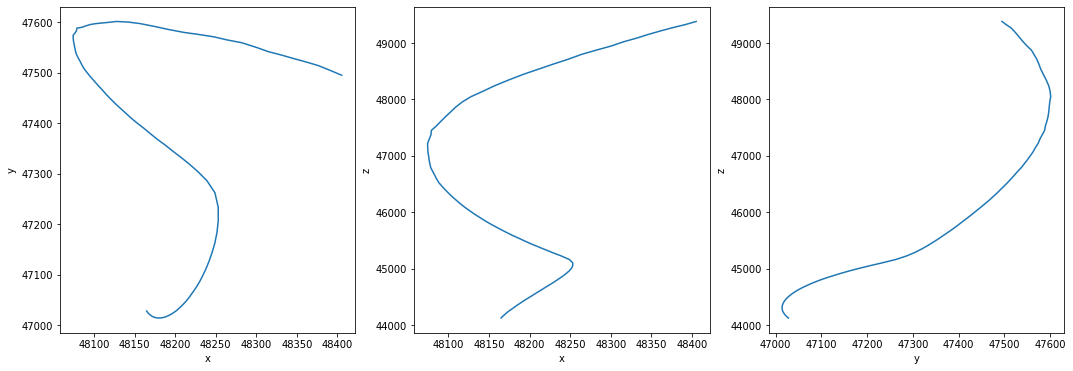

In [11]:
x, y, z = Po[:,0], Po[:,1], Po[:,2]

pl.figure(figsize=(18,6))

pl.subplot(1,3,1)
pl.plot(x, y)

pl.xlabel('x')
pl.ylabel('y')

pl.subplot(1,3,2)
pl.plot(x, z)

pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
pl.plot(y, z)

pl.xlabel('y')
pl.ylabel('z')


In [12]:
! cat /data/cielo/simulations/LG1/LG1_merger_trees.txt | grep 12800 > Snap128.txt

In [13]:
snap128IDs, ones = np.genfromtxt('Snap128.txt', dtype=int, unpack=True)

<ipython-input-14-f9ddf8a1be11>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(1,3,1)
<ipython-input-14-f9ddf8a1be11>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(1,3,2)
<ipython-input-14-f9ddf8a1be11>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

Text(0, 0.5, 'z')

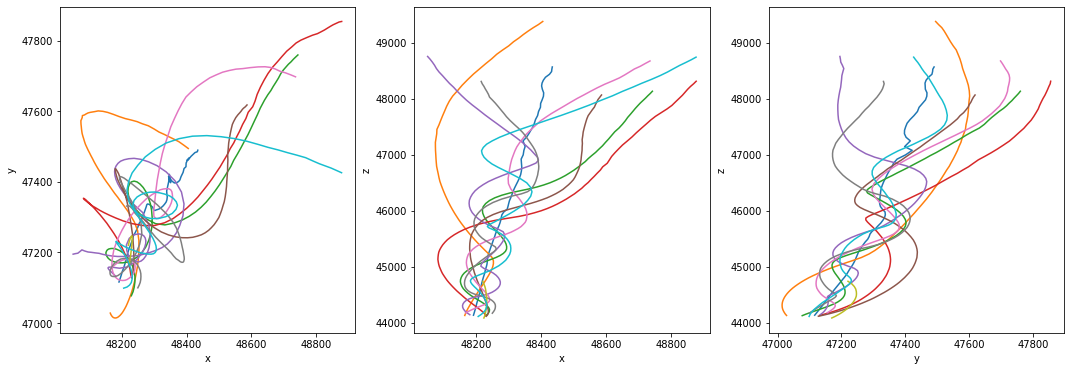

In [14]:
pl.figure(figsize=(18,6))

for uIDs in snap128IDs[:10]:
    stree = networkx.dfs_tree(trees, str(uIDs))
    mtree = get_main_branch_unique_ids(stree, str(uIDs))
    Po = []

    for idd in mtree:
        tsnapN, tsfid = split_unique_id(int(idd))
        Sgro = 'SnapNumber_{}/SubGroups/SubGroupPos'.format(tsnapN)
        try:
            Tpo = sim[Sgro][tsfid]
            Po.append(Tpo)
        except KeyError:
            pass
    
    Po = np.array(Po)
    
    x, y, z = Po[:,0], Po[:,1], Po[:,2]
    pl.subplot(1,3,1)
    pl.plot(x, y)

    pl.subplot(1,3,2)
    pl.plot(x, z)

    pl.subplot(1,3,3)
    pl.plot(y, z)


pl.subplot(1,3,1)
pl.xlabel('x')
pl.ylabel('y')    
    
pl.subplot(1,3,2)
pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
pl.xlabel('y')
pl.ylabel('z')

<ipython-input-16-10fd1f5762c8>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(1,3,1)
<ipython-input-16-10fd1f5762c8>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(1,3,2)
<ipython-input-16-10fd1f5762c8>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

Text(0, 0.5, 'z')

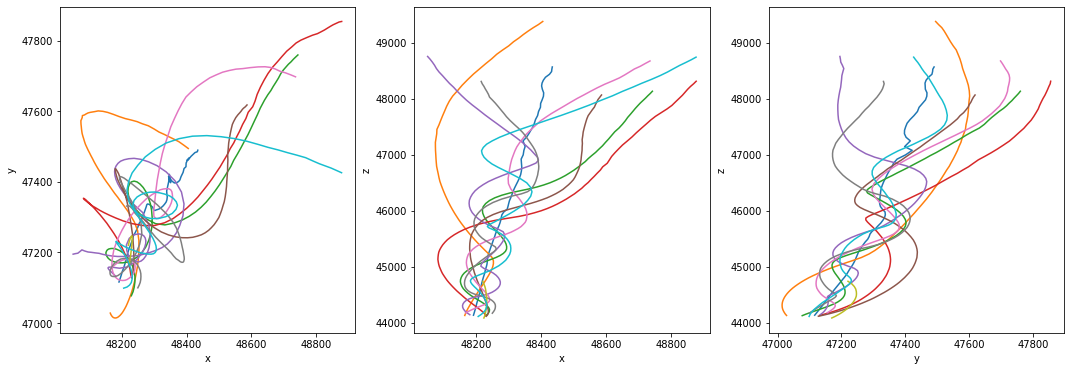

In [16]:
pl.figure(figsize=(18,6))

for i in range(0,10):
    uIDss = int(128*1e6+i)
    
    stree = networkx.dfs_tree(trees, str(uIDss))
    mtree = get_main_branch_unique_ids(stree, str(uIDss))
    Po = []

    for idd in mtree:
        tsnapN, tsfid = split_unique_id(int(idd))
        Sgro = 'SnapNumber_{}/SubGroups/SubGroupPos'.format(tsnapN)
        try:
            Tpo = sim[Sgro][tsfid]
            Po.append(Tpo)
        except KeyError:
            pass
    
    Po = np.array(Po)
    
    x, y, z = Po[:,0], Po[:,1], Po[:,2]
    pl.subplot(1,3,1)
    pl.plot(x, y)

    pl.subplot(1,3,2)
    pl.plot(x, z)

    pl.subplot(1,3,3)
    pl.plot(y, z)


pl.subplot(1,3,1)
pl.xlabel('x')
pl.ylabel('y')    
    
pl.subplot(1,3,2)
pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
pl.xlabel('y')
pl.ylabel('z')